<a href="https://colab.research.google.com/github/Mrudhula1/Programming-Quiz/blob/main/Quiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load dataset
data = pd.read_csv('stock_prices.csv')  # Replace 'stock_prices.csv' with the file containing your data
# Perform data cleaning
# For example, handle missing values, outliers, and inconsistencies

# Normalize the data
scaler = MinMaxScaler()
data['Normalized_Price'] = scaler.fit_transform(data['open'].values.reshape(-1, 1))

# Split into training and test sets (80% train, 20% test)
train_size = int(len(data) * 0.8)
train_data, test_data = data[:train_size], data[train_size:]

# Save the preprocessed datasets if needed
train_data.to_csv('train_data.csv', index=False)
test_data.to_csv('test_data.csv', index=False)


In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Assuming 'data' is your dataset
# Drop any non-numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Check for any remaining non-numeric values
if numeric_data.isnull().sum().sum() > 0:
    print("Error: Dataset contains missing values. Please handle them before scaling.")
    # Handle missing values appropriately
else:
    # Split the data into features (X) and target variable (y)
    X = numeric_data.drop(columns=['open'])  # Replace 'target_column' with the name of your target variable column
    y = numeric_data['open']

    # Check if there are any non-numeric values left in the dataset
    if X.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x)).all():
        # Normalize the features
        scaler = MinMaxScaler()
        X_scaled = scaler.fit_transform(X)

        # Split the dataset into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, shuffle=False)  # Assuming chronological order

        # Reshape the input data for LSTM (samples, time_steps, features)
        # Assuming a simple univariate time series, we reshape to (samples, time_steps, 1)
        X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
        X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
    else:
        print("Error: Dataset contains non-numeric values. Please handle them before scaling.")
        # Handle non-numeric values appropriately



import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the LSTM-based architecture
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # First LSTM layer
    Dropout(0.2),  # Dropout layer to prevent overfitting
    LSTM(units=64, return_sequences=True),  # Second LSTM layer
    Dropout(0.2),  # Dropout layer
    LSTM(units=64),  # Third LSTM layer
    Dropout(0.2),  # Dropout layer
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss = model.evaluate(X_test, y_test)

# Make predictions
predictions = model.predict(X_test)


Epoch 1/50
19/19 [==============================] - 8s 79ms/step - loss: 85293.5781 - val_loss: 47063.7461
Epoch 2/50
19/19 [==============================] - 0s 12ms/step - loss: 82794.6875 - val_loss: 43380.0195
Epoch 3/50
19/19 [==============================] - 0s 11ms/step - loss: 78510.5312 - val_loss: 41690.7695
Epoch 4/50
19/19 [==============================] - 0s 11ms/step - loss: 77346.5078 - val_loss: 40977.3438
Epoch 5/50
19/19 [==============================] - 0s 12ms/step - loss: 76404.1719 - val_loss: 40346.4727
Epoch 6/50
19/19 [==============================] - 0s 11ms/step - loss: 75602.0625 - val_loss: 39757.8750
Epoch 7/50
19/19 [==============================] - 0s 12ms/step - loss: 74833.7422 - val_loss: 39198.4023
Epoch 8/50
19/19 [==============================] - 0s 12ms/step - loss: 74099.0781 - val_loss: 38654.7148
Epoch 9/50
19/19 [==============================] - 0s 11ms/step - loss: 73405.6172 - val_loss: 38126.1250
Epoch 10/50
19/19 [==================

Epoch 1/50
19/19 [==============================] - 7s 75ms/step - loss: 85243.5938 - val_loss: 46962.8828
Epoch 2/50
19/19 [==============================] - 0s 11ms/step - loss: 82302.6094 - val_loss: 43112.8477
Epoch 3/50
19/19 [==============================] - 0s 13ms/step - loss: 78418.1953 - val_loss: 41648.6562
Epoch 4/50
19/19 [==============================] - 0s 11ms/step - loss: 77275.1641 - val_loss: 40939.1016
Epoch 5/50
19/19 [==============================] - 0s 12ms/step - loss: 76381.5391 - val_loss: 40311.1445
Epoch 6/50
19/19 [==============================] - 0s 12ms/step - loss: 75548.6641 - val_loss: 39722.5938
Epoch 7/50
19/19 [==============================] - 0s 16ms/step - loss: 74823.6250 - val_loss: 39160.0117
Epoch 8/50
19/19 [==============================] - 0s 18ms/step - loss: 74055.9688 - val_loss: 38621.1094
Epoch 9/50
19/19 [==============================] - 0s 20ms/step - loss: 73406.6094 - val_loss: 38094.6992
Epoch 10/50
19/19 [==================

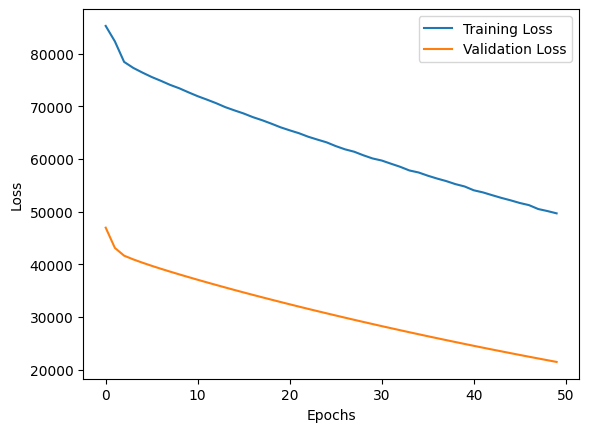

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense

# Define the LSTM-based architecture
model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),  # First LSTM layer
    Dropout(0.2),  # Dropout layer to prevent overfitting
    LSTM(units=64, return_sequences=True),  # Second LSTM layer
    Dropout(0.2),  # Dropout layer
    LSTM(units=64),  # Third LSTM layer
    Dropout(0.2),  # Dropout layer
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation loss to monitor convergence
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


5/5 [==============================] - 3s 9ms/step
Mean Absolute Error (MAE): 144.5075849870381
Root Mean Squared Error (RMSE): 146.584088731805


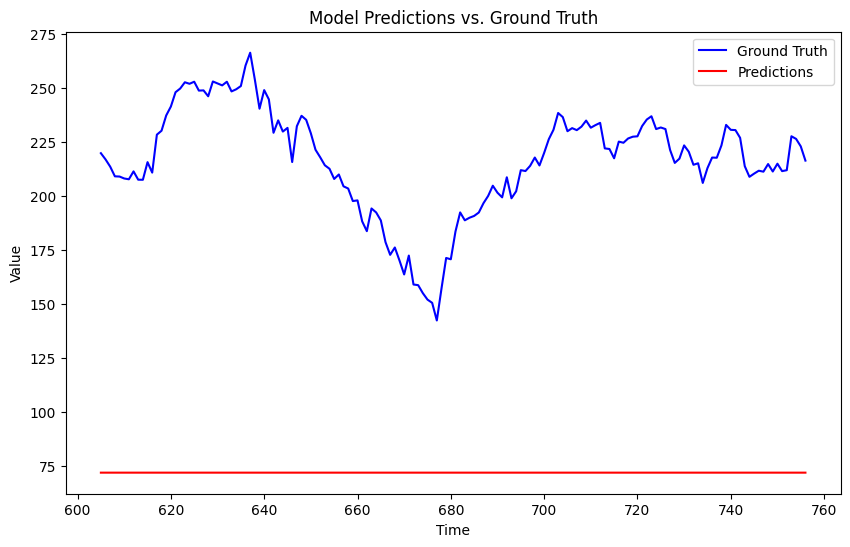

In [21]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Evaluate the model on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

# Visualize the model's predictions against the ground truth
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Ground Truth', color='blue')
plt.plot(y_test.index, y_pred, label='Predictions', color='red')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Model Predictions vs. Ground Truth')
plt.legend()
plt.show()


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
469/469 [==============================] - 6s 11ms/step - loss: 0.2525 - val_loss: 0.1642
Epoch 2/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1607 - val_loss: 0.1577
Epoch 3/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1581 - val_loss: 0.1566
Epoch 4/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1572 - val_loss: 0.1559
Epoch 5/10
469/469 [==============================] - 5s 10ms/step - loss: 0.1567 - val_loss: 0.1555
Epoch 6/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1563 - val_loss: 0.1552
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.1560 - val_loss: 0.1549
Epoch 8/10
469/469 [==============================] - 4s 9ms/step - loss: 0.1558 - val_loss: 0.1547
Epoch 9/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1556 - val_loss: 0.1545
Epoch 10/10
313/313 [========

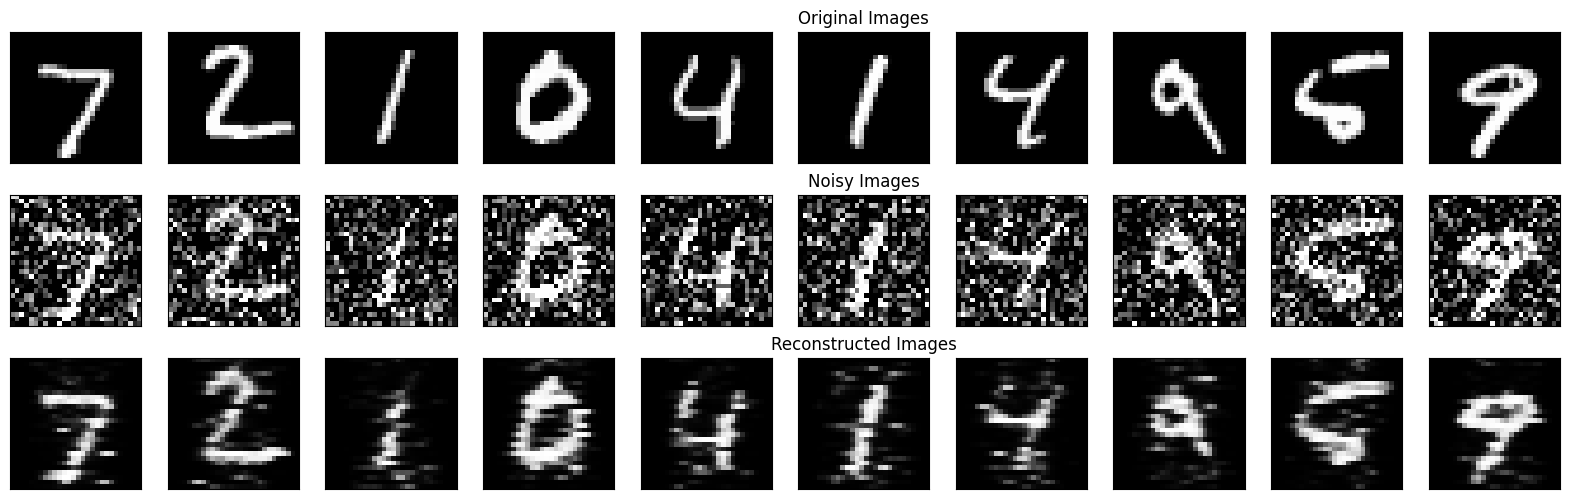

In [42]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


# In[1]:


import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Introduce random noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


# In[6]:


from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Autoencoder architecture
input_img = Input(shape=(28, 28))
encoded = Dense(128, activation='relu')(input_img)
decoded = Dense(28, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)


# In[7]:


autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train_noisy, x_train, epochs=10, batch_size=128, shuffle=True, validation_data=(x_test_noisy, x_test))


# In[8]:


decoded_imgs = autoencoder.predict(x_test_noisy)


# In[9]:


from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Autoencoder architecture with convolutional layers
input_img = Input(shape=(28, 28, 1))
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)


# In[10]:


import matplotlib.pyplot as plt

n = 10  # Number of images to display
plt.figure(figsize=(20, 6))
for i in range(n):
    # Original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Original Images')

    # Noisy images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(x_test_noisy[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Noisy Images')

    # Reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == n // 2:
        ax.set_title('Reconstructed Images')
plt.show()


# In[ ]:




